In [49]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from keras.datasets import mnist
import matplotlib.pyplot as plt

In [36]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], -1) / 255.0
X_test = X_test.reshape(X_test.shape[0], -1) / 255.0

# В keras датасет хранится уже в преобразованном числовом формате
X_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

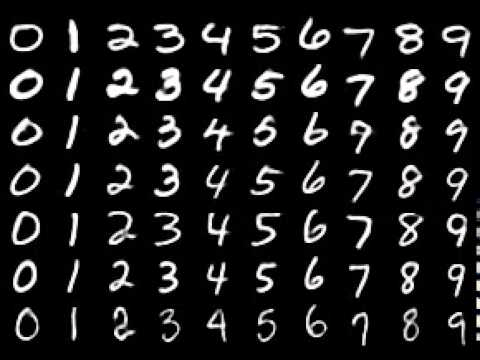

In [22]:
encoder = OneHotEncoder(sparse_output=False)
y_train_onehot = encoder.fit_transform(y_train.reshape(-1, 1))
y_test_onehot = encoder.transform(y_test.reshape(-1, 1))

### Класс линейного слоя

In [23]:
class Linear:
    def __init__(self, input_size, output_size):
        self.weights = np.random.randn(input_size, output_size) * 0.01
        self.bias = np.zeros((1, output_size))
        self.input = None

    def forward(self, x):
        self.input = x
        return np.dot(x, self.weights) + self.bias

    def backward(self, grad_output):
        grad_input = np.dot(grad_output, self.weights.T)
        grad_weights = np.dot(self.input.T, grad_output)
        grad_bias = np.sum(grad_output, axis=0, keepdims=True)

        # Обновление параметров
        self.weights -= learning_rate * grad_weights
        self.bias -= learning_rate * grad_bias

        return grad_input

### Классы активаций функций активаций

In [ ]:
class ReLU:
    def forward(self, x):
        self.input = x
        return np.maximum(0, x)

    def backward(self, grad_output):
        return grad_output * (self.input > 0)


class Softmax:
    def forward(self, x):
        exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
        self.output = exp_x / np.sum(exp_x, axis=1, keepdims=True)
        return self.output

    def backward(self, y_true):
        return self.output - y_true

### Класс для функции потерь MSE

In [25]:
class MSELoss:
    def forward(self, y_pred, y_true):
        self.y_pred = y_pred
        self.y_true = y_true
        return np.mean((y_pred - y_true) ** 2)

    def backward(self):
        return 2 * (self.y_pred - self.y_true) / self.y_true.shape[0]

### Архитектура нейронной сети

In [26]:
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.linear1 = Linear(input_size, hidden_size)
        self.relu = ReLU()
        self.linear2 = Linear(hidden_size, output_size)
        self.softmax = Softmax()
        self.loss_fn = MSELoss()

    def forward(self, x):
        out = self.linear1.forward(x)
        out = self.relu.forward(out)
        out = self.linear2.forward(out)
        out = self.softmax.forward(out)
        return out

    def backward(self, y_true):
        grad_loss = self.loss_fn.backward()
        grad_softmax = self.softmax.backward(y_true)
        grad_linear2 = self.linear2.backward(grad_softmax)
        grad_relu = self.relu.backward(grad_linear2)
        self.linear1.backward(grad_relu)

### Обучение сети

In [63]:
input_size = 28*28
hidden_size = 128
output_size = 10

learning_rate = 0.01
num_epochs = 15
batch_size = 64

In [64]:
model = NeuralNetwork(input_size, hidden_size, output_size)

for epoch in range(num_epochs):
    for i in range(0, len(X_train), batch_size):
        X_batch = X_train[i:i + batch_size]
        y_batch = y_train_onehot[i:i + batch_size]

        y_pred = model.forward(X_batch)

        loss = model.loss_fn.forward(y_pred, y_batch)
        model.backward(y_batch)

    # if epoch / 10 == int(epoch / 10):
    print(f'Epoch {epoch + 0}/{num_epochs}, Loss: {loss}')

Epoch 0/15, Loss: 0.012777740060463233
Epoch 1/15, Loss: 0.002037874711474405
Epoch 2/15, Loss: 0.0030352485862047167
Epoch 3/15, Loss: 0.00421302569355003
Epoch 4/15, Loss: 0.0013489859990909985
Epoch 5/15, Loss: 0.0004505814415655282
Epoch 6/15, Loss: 0.00010006847550415739
Epoch 7/15, Loss: 0.0001756662490467886
Epoch 8/15, Loss: 4.252859178267223e-05
Epoch 9/15, Loss: 1.7685709166487674e-05
Epoch 10/15, Loss: 3.436254396468756e-06
Epoch 11/15, Loss: 1.626220947681374e-05
Epoch 12/15, Loss: 4.076846855824866e-06
Epoch 13/15, Loss: 4.0786851103764635e-08
Epoch 14/15, Loss: 8.399041830286778e-06


In [65]:
predictions = model.forward(X_test)

predicted_classes = np.argmax(predictions, axis=1)
accuracy = np.mean(predicted_classes == y_test)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 97.37%


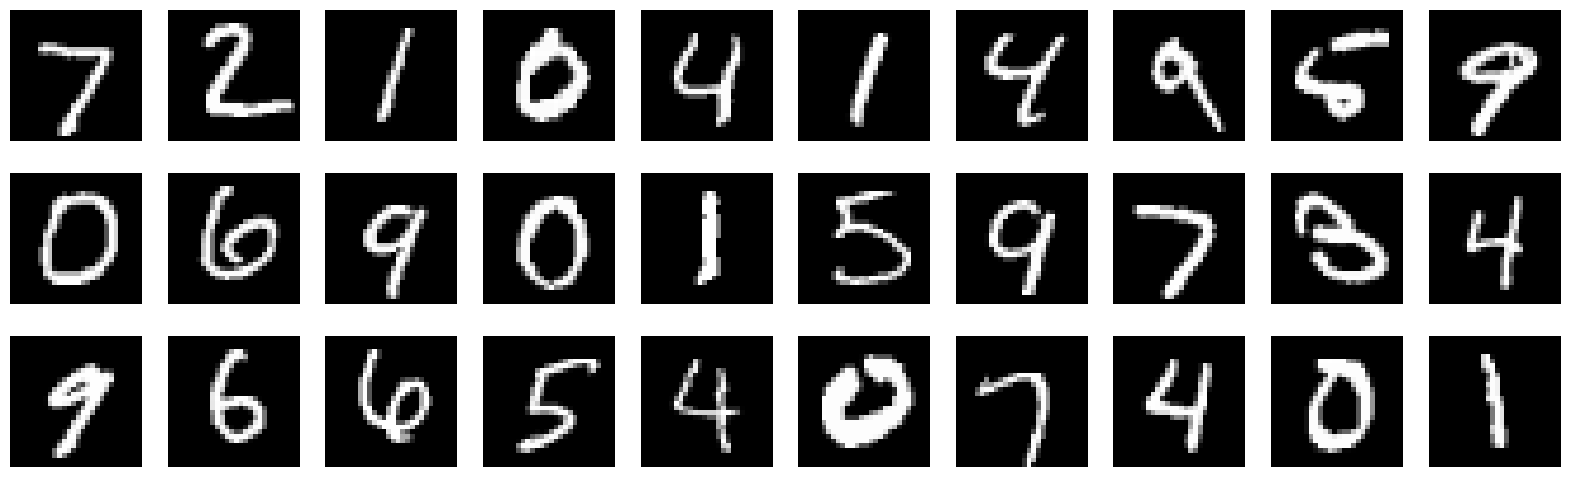

In [66]:
def plot_images(images, n_cols=10):
    n_images = len(images)
    n_rows = (n_images + n_cols - 1) // n_cols
    plt.figure(figsize=(n_cols * 2, n_rows * 2))
    for i in range(n_images):
        plt.subplot(n_rows, n_cols, i + 1)
        plt.imshow(images[i].reshape(28, 28), cmap='gray')
        plt.axis('off')
    plt.show()

images_to_display = X_test[:30]
plot_images(images_to_display)

In [67]:
print(predicted_classes[:10])
print(predicted_classes[10:20])
print(predicted_classes[20:30])

[7 2 1 0 4 1 4 9 5 9]
[0 6 9 0 1 5 9 7 3 4]
[9 6 6 5 4 0 7 4 0 1]
